# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO

#Loading data
import pandas as pd
haberman_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
haberman_data = pd.read_csv(haberman_url, header = None, names=['age', 'operation_year_1900s', 
                                                                'positive_axillary_nodes_detected', 'survival_status'])

#Check for number of data (306, 4). Checked in the name file
haberman_data.shape

#Missing values? No missing values
haberman_data.isna().sum().sum()

#Added names when loading the data.

#Encode 1 for survial >5 and 0 for no survial
haberman_data['survival_status'].replace(2,0, inplace=True)

haberman_data.head()


,age,operation_year_1900s,positive_axillary_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# TODO
import matplotlib.pyplot as plt

#Summary statistics
haberman_data.describe()


,age,operation_year_1900s,positive_axillary_nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
#Crosstab
nodes_bins= pd.cut(haberman_data['positive_axillary_nodes_detected'], 10)#Cut data into 10 groups
nodes_survival_ct = pd.crosstab(nodes_bins, haberman_data['survival_status'], normalize='index')
nodes_survival_ct

survival_status,0,1
positive_axillary_nodes_detected,,
"(-0.052, 5.2]",0.194915,0.805085
"(5.2, 10.4]",0.400000,0.600000
"(10.4, 15.6]",0.611111,0.388889
"(15.6, 20.8]",0.500000,0.500000
"(20.8, 26.0]",0.666667,0.333333
"(26.0, 31.2]",0.000000,1.000000
"(31.2, 36.4]",1.000000,0.000000
"(36.4, 41.6]",0.000000,0.000000
"(41.6, 46.8]",0.000000,1.000000


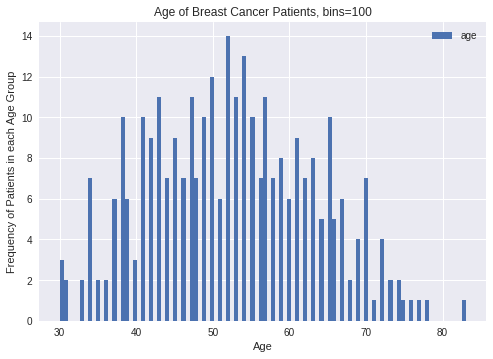

In [0]:
#Histogram
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(haberman_data['age'], bins=100)
ax.legend()
plt.xlabel('Age')
plt.ylabel('Frequency of Patients in each Age Group')
plt.title('Age of Breast Cancer Patients, bins=100')
plt.show()

#Close to normal distribution of the the age data

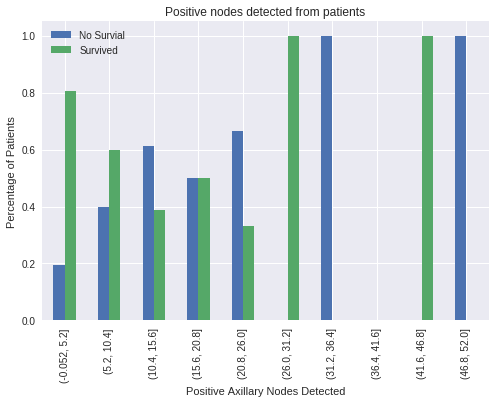

In [0]:
#Bar Graph
ct_bar = nodes_survival_ct.plot(kind='bar', title='Positive nodes detected from patients')
ct_bar.set_xlabel('Positive Axillary Nodes Detected')
ct_bar.set_ylabel('Percentage of Patients')
ct_bar.legend(['No Survial', 'Survived']);


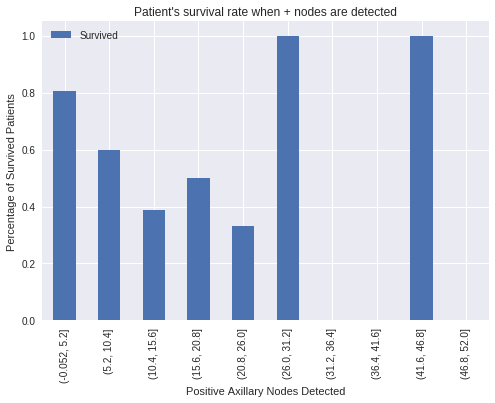

In [0]:
#Pivot table/bar graph of patients survival frequency when + nodes are detected
pvt_bar=pd.pivot_table(haberman_data, values='survival_status', index=nodes_bins).plot.bar(title='Patient\'s survival rate when + nodes are detected');
pvt_bar.set_xlabel('Positive Axillary Nodes Detected')
pvt_bar.set_ylabel('Percentage of Survived Patients')
pvt_bar.legend(['Survived']);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#Analysis and Interpretation of the bar graph
**1)**     There's a positive relationship of the frequency of patients who did not survive if the detection number of positive axillary nodes is high.

**2)**     There's a negative relationship of the frequency of patients who survive if the detection number of positive axillary nodes is low.

**3)**     Assuming we ignore the outliers of 26 detection and above. The two features are inversely related to each other. When detection number goes up then the percentage of survival goes down and vice versa.